## DATA 690 Homework 5 (100 points - Due on Tuesday, October 17, 2023 by 11:59 pm ET)

The output of this assignment for submission should be in PDF format **AND** .py or .ipynb.

The name of the file should be as follows:

    Lastname_Firstname_Homework5.pdf (example: Thomas_Sunela_Homework5.pdf)
   **AND**
   
    Lastname_Firstname_Homework5.ipynb (example: Thomas_Sunela_Homework5.ipynb)
    
In short, you are submitting the python notebook as well as the pdf of that notebook.
Do **NOT** submit .html file, the system will give you an error.

    
**Incorrect file name will cost you points!<br>**

Instructions for converting a Jupyter Python notebook to PDF:
                                        
    Go to the menu and choose, File --> Download As --> html.
    Open that html file and print it to PDF.
    Submit the PDF file **NOT** the html file.

If you are using Google Colab, remember to review the PDF before submitting to ensure that all cells and answers are displayed in the PDF.


**Things to note:**

* Each cell should display an output
* Use both Markdown and code comments in the Jupyter Notebook as needed

### You have 2 weeks to complete this assignment. IF YOU ARE MAKING ANY ASSUMPTIONS, WRITE THAT IN A MARKDOWN CELL OR COMMENT
### $\color{red}{\text{Answer the questions asked as well, not just code}}$. Answer the questions asked in a separate markdown cell



## Mass Shootings in the USA

The two tables provided has information about all of the mass-shootings in the USA in 2018 and 2019 (as of 8/31/19). In the following exercises you will explore these data using all the different techniques you have learned thus far.

In [23]:
# Load libraries and specify useful notebook arguments

import pandas as pd
%matplotlib inline
pd.set_option('display.max_colwidth', -1)

<ipython-input-23-210fb3df8ee5>:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [24]:
# Load data

from google.colab import files


uploaded = files.upload()

shooting_2018 = pd.read_csv('2018_mass_shootings.csv')
shooting_2018.head()

Saving 2018_mass_shootings.csv to 2018_mass_shootings (1).csv


,Date,Location,Dead,Injured,Total,Description
0,"December 31, 2018","Cleveland, Ohio",3,2,5,A dispute began at a rented Airbnb during a New Year's Eve party. Three men were killed and another man and woman were wounded.[11]
1,"December 29, 2018","Lima, Ohio",1,3,4,One person was killed and three people were wounded in a shooting at an after hours club.[12]
2,"December 28, 2018","St. Charles, Missouri",4,1[n 1],6,"A gunman shot and killed his girlfriend, her two children, and her mother. He was arrested after exchanging fire with police and attempting to carjack a vehicle.[13]"
3,"December 24, 2018","Lutcher, Louisiana",2,2,4,Three people were killed and two others were wounded in a shooting outside of a bar.[14]
4,"December 23, 2018","Springfield, Missouri",0,7,7,Seven people were wounded during a shooting at a holiday party.[15]


In [25]:
# Load data

from google.colab import files


uploaded = files.upload()

shooting_2019 = pd.read_csv('2019_mass_shootings.csv')
shooting_2019.head()

Saving 2019_mass_shootings.csv to 2019_mass_shootings (1).csv


,Date,Location,Dead,Injured,Total,Description
0,"January 1, 2019","Columbia, South Carolina",0,5,5,Five people were shot and wounded outside of a nightclub around 6am local time.[316]
1,"January 1, 2019","Tallahassee, Florida",0,5,5,Five people were shot and wounded around 3am local time at the University Village Shopping Center.[317]
2,"January 2, 2019","Jonesboro, Arkansas",1,3,4,A 16-year-old boy was killed and three others were wounded during a home invasion.[315]
3,"January 3, 2019","Texas City, Texas",3,1,4,Three children under the age of six were found deceased along with a wounded woman in an apparent home invasion.[314]
4,"January 4, 2019","Hurt, Virginia",3[n 1],2,5,A man killed his wife and son in their home and injured two people who were inside a vehicle before killing himself.[311]


### Problem 1: (5 points)

<span  style="color:purple; font-size:16px">Create a single DataFrame `shootings` by stacking the 2018 and 2019 mass shooting data and reseting the index. As of August 31, 2019, how many mass shootings were there in the US in 2018 and 2019?</span>

In [42]:
# Answer
import pandas as pd


# DataFrames for 2018 and 2019
df_2018 = pd.DataFrame(shooting_2018)
df_2019 = pd.DataFrame(shooting_2019)

shootings = pd.concat([df_2018, df_2019], ignore_index=True)

total_shootings = shootings.shape[0]

print(total_shootings)


620


There were 620 shootings in 2018 and 2019.

### Problem 2: (5 points)

<span  style="color:purple; font-size:16px">Create a new DataFrame `locations` by splitting the `Location` into two columns: `City` and `State`.</span>

In [43]:
# Answer
import pandas as pd

locations = shootings["Location"].str.split(", ", expand=True)
locations.columns = ["City", "State"]

locations = pd.concat([shootings, locations], axis=1)
locations = locations.drop("Location", axis=1)


### Problem 3: (5 points)

<span  style="color:purple; font-size:16px">Use the appropriate methods to add `locations` to `shootings` and drop the `Location` column.</span>

In [44]:
# Answer
import pandas as pd

shootings = pd.concat([shootings, locations], axis=1)
shootings = shootings.drop("Location", axis=1)



### Problem 4: (5 points)

<span  style="color:purple; font-size:16px">Load the `territory_abbr.csv` data as `abbr`. Attempt to merge `abbr` with `shootings` (on the `State` column) to create `shootings_bad`, a DataFrame with a new column `Abbreviation`, using the appropriate join. Examine the results. What problem do you see in the resulting table?</span>

In [55]:
# Answer
import pandas as pd

from google.colab import files


uploaded = files.upload()

abbr = pd.read_csv('territory_abbr.csv')

# Merge abbr with shootings on "State" column
shootings_bad = shootings.merge(abbr, on='State', how='left')

print(shootings_bad)


Saving territory_abbr.csv to territory_abbr (3).csv
                  Date               Date    Dead    Dead Injured Injured  \
0    December 31, 2018  December 31, 2018  3       3       2       2        
1    December 29, 2018  December 29, 2018  1       1       3       3        
2    December 28, 2018  December 28, 2018  4       4       1[n 1]  1[n 1]   
3    December 24, 2018  December 24, 2018  2       2       2       2        
4    December 23, 2018  December 23, 2018  0       0       7       7        
..                 ...                ... ..      ..      ..      ..        
615  August 30, 2019    August 30, 2019    0       0       10      10       
616  August 30, 2019    August 30, 2019    1       1       3       3        
617  August 31, 2019    August 31, 2019    6[n 1]  6[n 1]  21      21       
618  August 31, 2019    August 31, 2019    1       1       3       3        
619  August 31, 2019    August 31, 2019    0       0       4       4        

     Total  Total  \
0 

The problem I see is that there is "[n 1]" featured in a couple columns and it is unknown what those mean. There's also a missing state for Baltimore because Maryland is included in the City column.

### Problem 5: (5 points)

<span  style="color:purple; font-size:16px">The problem with the merge in the previous problem was that there was extra whitespace in one or both of the DataFrames. We can fix this using the `str.strip()` method. Apply this method to the relevant columns needed for the join, then repeat the merge above. This time you should be successful. Once you have everything working, merge the data and reassign the DataFrame to `shootings`.</span>

(After this exercise, you should have a DataFrame called `shootings` with the following columns: 'Date', 'Dead', 'Injured', 'Total', 'Description', 'City', 'State', 'Abbreviation')

In [72]:
import pandas as pd

duplicates = shootings.columns[shootings.columns.duplicated()]
shootings = shootings.loc[:, ~shootings.columns.duplicated()]

print(shootings['Dead'].dtype)

int64


In [73]:
# Answer
import pandas as pd
abbr = pd.read_csv('territory_abbr.csv')

shootings['State'] = shootings['State'].str.strip()
abbr['State'] = abbr['State'].str.strip()

shootings = shootings.merge(abbr, on='State', how='left')
shootings = shootings[['Date', 'Dead', 'Injured', 'Total', 'Description', 'City', 'State', 'Abbreviation']]

### Problem 6: (5 points)

<span  style="color:purple; font-size:16px">How many unique States/territories had a mass shooting in 2018 or 2019 (as of 8/31/19)?</span>

In [74]:
# Answer

unique_states = shootings['State'].nunique()
print(unique_states)

41


There are 41 unique States/territories that had a mass shooting in 2018/2019.

### Problem 7: (5 points)

<span  style="color:purple; font-size:16px">Extract the `State` column from `shootings` as a DataFrame. Identify all states/US territories that did not have a mass shooting in 2018 or 2019 (as of 8/31/19) using an appropriate join with the `abbr`. Call the resulting table `shooting_free_states`. (Hint: The `indicator` argument of `merge()` could be useful.) How many states/territories are contained in `shooting_free_states`?</span>

In [60]:
# Answer
import pandas as pd

states_from_shootings = shootings[['State']]
shooting_free_states = states_from_shootings.merge(abbr[['State']], on='State', how='outer', indicator=True)

shooting_free_states = shooting_free_states[shooting_free_states['_merge'] != 'both']
shooting_free_states = shooting_free_states.drop('_merge', axis=1)

num_free_states = shooting_free_states.shape[0]

print(num_free_states)

33


There are 33 states/territories that didn't have a mass shooting in 2018/2019.

### Problem 8: (5 points)

<span  style="color:purple; font-size:16px">The `Dead`, `Injured`, and `Total` columns are supposed to contain information about the number of people that died or were injured. Looking at the `.info()` output, it appears that there are some characters (of the form `[<stuff>]`) in the columns that is preventing Pandas from recognizing these columns as numbers. Identify the unusual characters from the `Dead` column.</span>
    
<span  style="color:purple; font-size:16px">Use regular expressions to filter the data and create a DataFrame `shootings_sub` containing observations with non-numbers in this column. (Can you determine from your results what might be meant by `[n 1]`?)</span>

In [61]:
# Answer
import pandas as pd
import re

pattern = r'[^\d\n]+'

non_numeric_mask = shootings['Dead'].str.contains(pattern, regex=True)
shootings_sub = shootings[non_numeric_mask]

print(shootings_sub)


                   Date         Dead  Injured  Total  \
25   November 19, 2018   4[n 1]       0        4       
30   November 13, 2018   2[n 1]       2        4       
31   November 13, 2018   4[n 1]       1        5       
36   November 7, 2018    13[n 1]      12       25      
39   November 2, 2018    3[n 1]       5[n 2]   8       
55   October 15, 2018    5[n 1]       0        5       
73   September 21, 2018  4[n 1]       3        7       
74   September 20, 2018  1[n 1]       4        5       
75   September 20, 2018  1[n 1]       3        4       
76   September 17, 2018  4[n 1]       1        5       
77   September 13, 2018  6[n 1]       0        6       
78   September 6, 2018   4[n 1]       2        6       
82   August 26, 2018     3[n 1]       11[n 3]  14      
98   August 12, 2018     4[n 1]       1        5       
125  July 27, 2018       5[n 1]       0        5       
189  June 17, 2018       1[n 1]       22[n 6]  23      
199  June 11, 2018       5[n 1]       1        6

I think [n 1] refers to the shooter also being injured/killed in the shooting as well.

### Problem 9: (5 points)

<span  style="color:purple; font-size:16px">Remove the strange characters from the `Dead` and `Injured` columns. Convert the `Dead` and `Injured` columns to integers. Print something to verify that you successfully converted the columns to integers. (Hint: it might help to break this into steps.)</span>

In [62]:
# Answer
import pandas as pd
import re

shootings['Dead'] = shootings['Dead'].str.replace(r'[^\d]+', '', regex=True)
shootings['Injured'] = shootings['Injured'].str.replace(r'[^\d]+', '', regex=True)

shootings['Dead'] = shootings['Dead'].astype(int)
shootings['Injured'] = shootings['Injured'].astype(int)

print(shootings[['Dead', 'Injured']].head())

   Dead  Injured
0  3     2      
1  1     3      
2  4     11     
3  2     2      
4  0     7      


### Problem 10: (5 points)

<span  style="color:purple; font-size:16px">Create a horizontal bar graph showing the number of shootings per state. Make the `figsize = (15,10)`. What are the top 3 states in terms of the number of mass shootings in 2018/2019?</span>

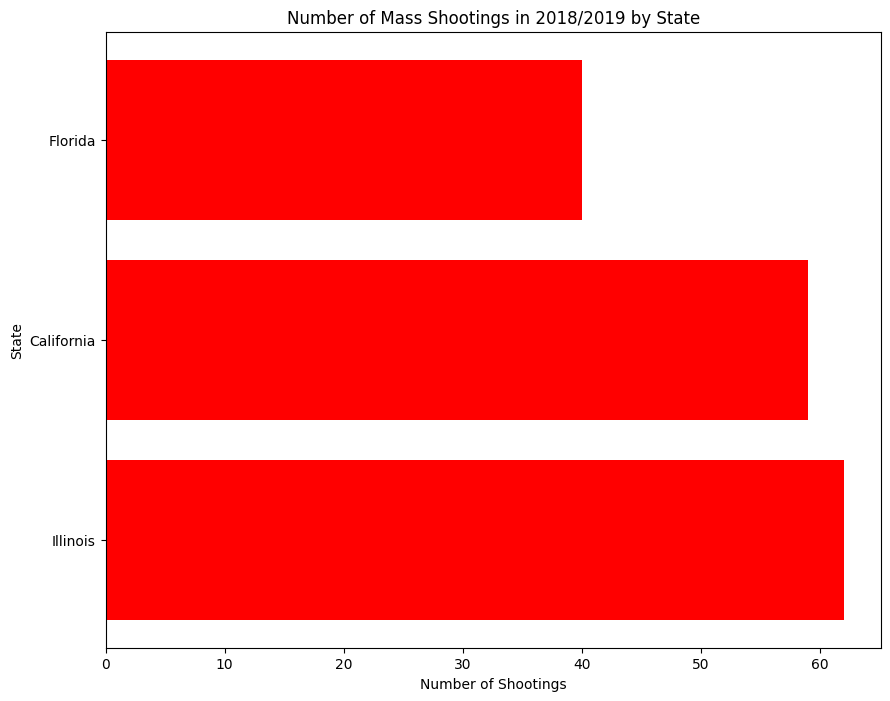

In [17]:
# Answer
import matplotlib.pyplot as plt

shootings_per_state = shootings['State'].value_counts()
top_states = shootings_per_state.head(3)

plt.figure(figsize=(10, 8))

#horizontal bar graph
plt.barh(top_states.index, top_states.values, color='red')
plt.xlabel('Number of Shootings')
plt.ylabel('State')
plt.title('Number of Mass Shootings in 2018/2019 by State')

plt.show()

The top 3 states are Illinois, California, and Florida.

### Problem 11 - Multi-Step: (10 points)

<span  style="color:purple; font-size:16px">An issue with the previous analysis is that it appears to be the case that more populous states have more mass shootings. We need to fix that. The `pops_by_state.csv` contains 2018 population estimates for US states and regions (you only need the `NAME` and `POPESTIMATE2018` columns). </span>

1. Load this population data into a new DataFrame, `state_population`.
1. Create another new DataFrame, `shootings_by_state`, containing the counts of mass shooting by state, like you created for the bar graph in Problem 10.
1. Merge `state_population` into `shootings_by_state`. (Hint: convert any Series to a DataFrame for use with `merge()`. This may also involve resetting an index. It is not necessary but it could be easier if you appropriately rename columns before merging.)
1. Create a new column, `SPP`, for the number of shootings divided by the state population.
1. Remove all columns from `state_population` except for the column containing the state name and the `SPP` column.
1. Set the state names to be the index.
1. Sort the values in ascending order by `SPP`.
1. Re-create the bar plot with the new variable `SPP`.

<span  style="color:purple; font-size:16px">What are the top 3 states in terms of the number of mass shootings per person? Any state/regions really stand out?</span>

In [35]:
#load data
from google.colab import files


uploaded = files.upload()

state_population = pd.read_csv('pops_by_state.csv')



Saving pops_by_state.csv to pops_by_state.csv


In [36]:
# Answer - prepare df1

state_population = pd.read_csv('pops_by_state.csv', usecols=['NAME', 'POPESTIMATE2018'])


In [37]:
# Answer - prepare df2
shootings_by_state = shootings['State'].value_counts().reset_index()
shootings_by_state.columns = ['NAME', 'Mass_Shootings_Count']

In [38]:
# Answer - Merge
shootings_by_state = pd.merge(shootings_by_state, state_population, on='NAME')

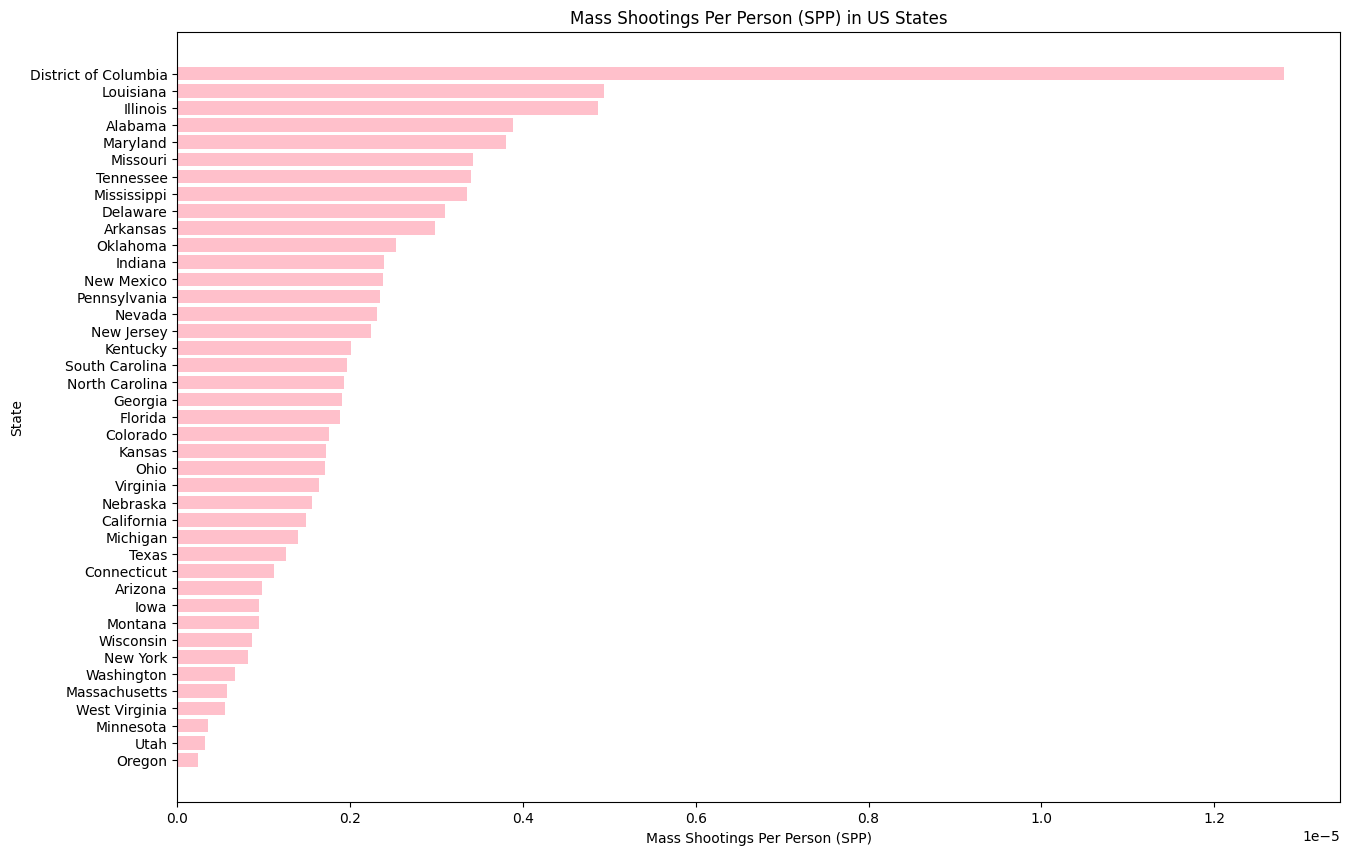

                           SPP
NAME                          
District of Columbia  0.000013
Louisiana             0.000005
Illinois              0.000005


In [70]:
# Answer - Create new var, drop vars, set index, sort, and plot
import matplotlib.pyplot as plt

# Calculate SPP (number of shootings / the state population)
shootings_by_state['SPP'] = shootings_by_state['Mass_Shootings_Count'] / shootings_by_state['POPESTIMATE2018']

state_population = shootings_by_state[['NAME', 'SPP']]

state_population.set_index('NAME', inplace=True)
state_population = state_population.sort_values(by='SPP')

#bar plot for SPP
plt.figure(figsize=(15, 10))
plt.barh(state_population.index, state_population['SPP'], color='pink')
plt.xlabel('Mass Shootings Per Person (SPP)')
plt.ylabel('State')
plt.title('Mass Shootings Per Person (SPP) in US States')
plt.show()

top_3_states = state_population.nlargest(3, 'SPP')
print(top_3_states)

The top 3 states are DC, Louisana and Illinois. It looks like Oregon is the least. I'm not suprised that DC is the first since you hear about mass shootings at least a few times a week on the local news. Overall, the midwest of US is not bad which is interesting since guns are allowed to be carried in that area.

### Problem 12: (10 points)

<span  style="color:purple; font-size:16px">Using the `shootings` data, create a scatterplot of the number `Injured`(as the x-variable) and the number killed `Dead` (as the y-variable).</span>

<span  style="color:purple; font-size:16px">Do you see any unusual patterns? How would you describe the relationship between the number injured in a shooting and the number killed in a shooting? (Use `alpha = 0.2` to better see the observations.)</span>

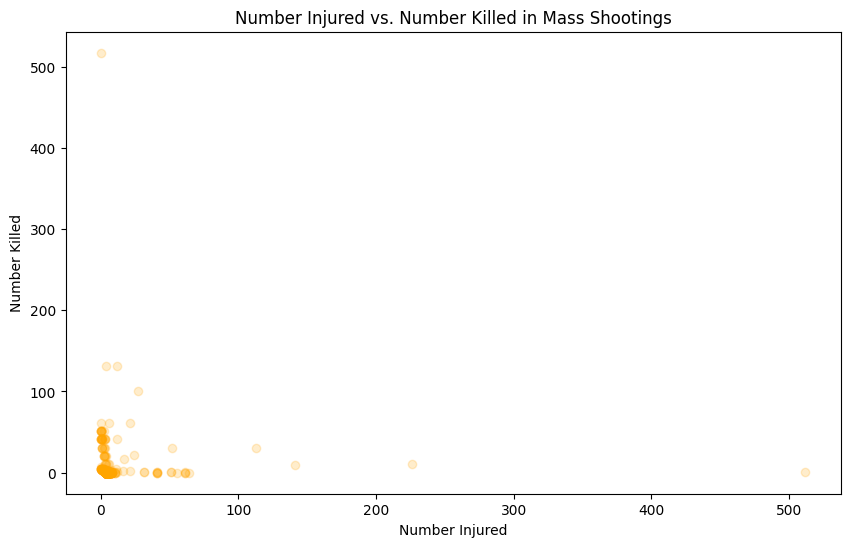

In [69]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

# scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(shootings['Injured'], shootings['Dead'], alpha=0.2, color='orange')
plt.xlabel('Number Injured')
plt.ylabel('Number Killed')
plt.title('Number Injured vs. Number Killed in Mass Shootings')

plt.show()

It looks like that the number of people injured and the number of people killed in a shooting are close together. More people are killed than injured in a mass shooting based on the graph.

### Problem 13: (10 points)

<span  style="color:purple; font-size:16px">It has been noted that mass-shootings tend to spike during times of extreme heat, particularly in urban areas. The goal of this exercise is to create a horizontal bar graph of the number of shootings by (`<month> <year>`), ordered from most to fewest, to explore the plausibility of this fact. Create this plot by using `str.replace()` to remove everything except the month and year from the `Date` column instead of using any time-series methods. For example: `August 4, 2018` becomes `August 2018`</span>

<span  style="color:purple; font-size:16px">Does the plot seem to suggest that there may be a correlation between temperature and number of mass shootings? What other confounding variables might explain the relationship? (Postulate an explanation, there is not a *right* answer.)</span>

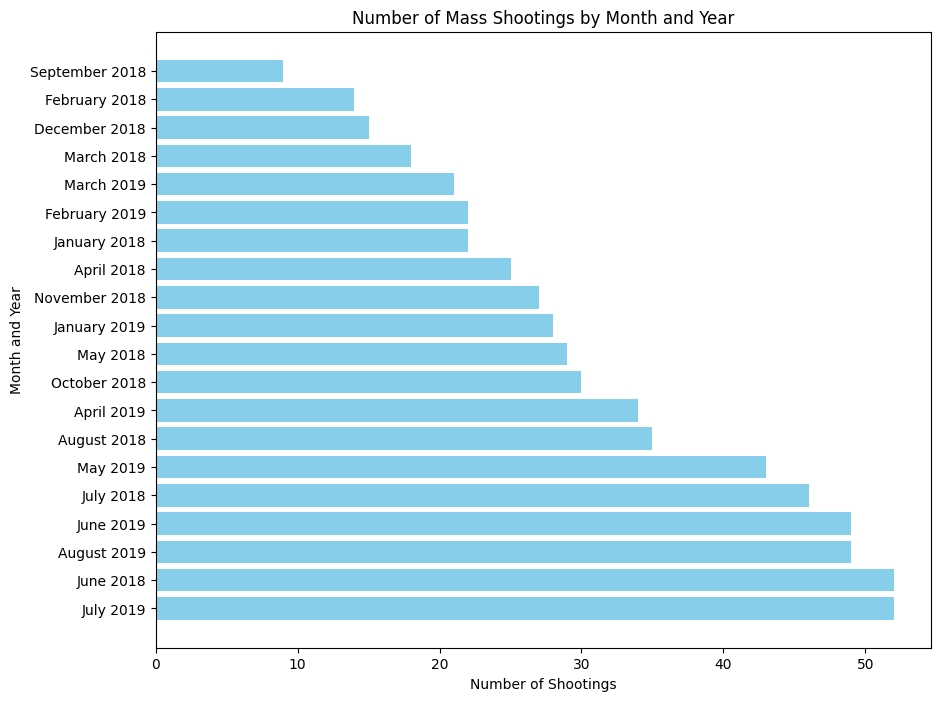

In [64]:
# Answer
import pandas as pd
import matplotlib.pyplot as plt

shootings['Date'] = shootings['Date'].str.replace(r'\s\d+,', '', regex=True)

shootings_by_month_year = shootings['Date'].value_counts().reset_index()
shootings_by_month_year.columns = ['Month_Year', 'Shooting_Count']

shootings_by_month_year = shootings_by_month_year.sort_values(by='Shooting_Count', ascending=False)

#horizontal bar graph
plt.figure(figsize=(10, 8))
plt.barh(shootings_by_month_year['Month_Year'], shootings_by_month_year['Shooting_Count'], color='skyblue')
plt.xlabel('Number of Shootings')
plt.ylabel('Month and Year')
plt.title('Number of Mass Shootings by Month and Year')

plt.show()



It can be concluded that there is a correlation between the temperature and number of mass shootings. Based on the data, it looks like the hotter it is, the higher number of shootings occur. For example, in Dec. 2018, there were less than 20 shootings. But, in July 2019, there were over 50 shootings. This could be due to the fact that there are more mass gatherings and occasions in the summertime where mass shootings occur, versus in the colder months where more people are at home.

### Problem 14: (10 points)

<span  style="color:purple; font-size:16px">Create a new DataFrame `family_shootings` containing all observations where the shooting involved a family member (brother, sister, mother, father, son, daughter, aunt, uncle) or significant other (spouse, girlfriend, boyfriend, fiancee). How many shootings make reference to a family member?</span>

<span  style="color:purple; font-size:16px">Note: we need to be careful with 'son' since many words contain this string like the word 'person'. Make use of a word boundary `\b` to eliminate this problem.</span>

In [65]:
# Answer
import pandas as pd

family_references = ['brother', 'sister', 'mother', 'father', 'son', 'daughter', 'aunt', 'uncle', 'spouse', 'girlfriend', 'boyfriend', 'fiancee']
family_mask = [any(ref in description.lower() for ref in family_references) for description in shootings['Description']]

family_shootings = shootings[family_mask]
num_family_shootings = len(family_shootings)

print(num_family_shootings)


132


There have been 132 shootings that make reference to a family member.

### Problem 15: (10 points)

<span  style="color:purple; font-size:16px">List all shootings involving a suicide. What proportion of family shootings involved the shooter committing suicide?</span>

In [67]:
# Answer
import pandas as pd

suicide_keywords = ['suicide', 'self-inflicted', 'self-inflict', 'self-inflicted wound']

suicide_shootings = shootings[shootings['Description'].str.contains('|'.join(suicide_keywords), case=False, regex=True)]

family_suicide_shootings = suicide_shootings[suicide_shootings['Description'].str.contains('|'.join(family_references), case=False, regex=True)]
proportion_family_suicide = len(family_suicide_shootings) / len(suicide_shootings)


print("Shootings Involving Suicide:")
print(suicide_shootings)

print(proportion_family_suicide)


Shootings Involving Suicide:
               Date  Dead  Injured  Total  \
26   November 2018   1     31       4       
31   November 2018   41    1        5       
39   November 2018   31    52       8       
55   October 2018    51    0        5       
76   September 2018  41    1        5       
77   September 2018  61    0        6       
125  July 2018       51    0        5       
146  July 2018       5     0        5       
150  July 2018       3     2        5       
222  May 2018        5     1        6       
280  March 2018      517   0        5       
295  February 2018   41    3        7       
296  February 2018   51    0        5       
301  January 2018    51    0        5       
396  April 2019      3     2        5       
467  May 2019        21    3        5       
530  July 2019       41    0        4       
556  July 2019       3     1        4       
568  July 2019       31    1        4       
571  August 2019     31    1        4       
579  August 2019     41   

41.6% of family shootings involved the shooter commiting suicide.